Olympic History: Athletes and Results
Source: Kaggle, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results 
Rows: 136893, Columns:14
This is an Olympic dataset that consists information of athletes and results from the year 1988 to 2016. The dataset has name of athletes, country they belong to, their height, weight and age and the medal they won. It consists the results of both summer and winter Olympics. With the information about each and every event in Olympics. There is close to 3% of null values in the Olympic dataset. The medal column describes which medal was won, and is ‘none’ if no medal is won. As there were null values in the height column, they have been replaced with the average height of particular sport of a given country. Similar process is followed for weight and age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_excel("./csvs/olympics_dataset.xlsx")

In [129]:
df.drop_duplicates(inplace=True) #removing duplicate rows (actually there's no duplicate rows in this dataset)

In [130]:
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [4]:
#total actual null values
df.isnull().sum().sum() - df.isnull().sum()['Medal'] #null values ignoring medals

14521

In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,136892.000000,136723.000000,129931.000000,129501.000000,136892.000000
mean,68779.118962,25.322960,175.813516,71.035751,2002.154501
std,39143.215332,5.392279,10.894620,15.075233,8.923408
min,1.000000,11.000000,127.000000,28.000000,1988.000000
25%,35269.000000,22.000000,168.000000,60.000000,1994.000000
50%,68960.500000,25.000000,176.000000,70.000000,2002.000000
75%,102511.000000,28.000000,183.000000,80.000000,2010.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [6]:
#null values in dataset in each columns
df.isnull().sum()

ID             0
Sex            0
Age          169
Height      6961
Weight      7391
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     118266
dtype: int64

Data Cleaning

In [7]:
#filling 'none' in place of null in medals, indicating that player has won no medal
df['Medal'].fillna('none', inplace=True)

In [8]:
#null values after filling the null values that were in medal
df.isnull().sum()

ID           0
Sex          0
Age        169
Height    6961
Weight    7391
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [9]:
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,24.0,176.0,66.0,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,22.0,188.0,96.0,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [88]:
#list of countries and sports
country_list = list(set(df.NOC))
sport_list = list(set(df.Sport))

In [89]:
#copying the dataframe for safety
copydf = df.copy()

In [92]:
#handling the null values in Age, Height and Weight column
#idea is to fill the average(mean) of particular country and sport for the missing value of same category
for country in country_list:
    for sport in sport_list:
        copydf.loc[copydf.Height.isnull() & (copydf.NOC == country) & (copydf.Sport == sport), 'Height'] = copydf.loc[(copydf.NOC == country) & (copydf.Sport == sport), 'Height'].mean()
        copydf.loc[copydf.Age.isnull() & (copydf.NOC == country) & (copydf.Sport == sport), 'Age'] = copydf.loc[(copydf.NOC == country) & (copydf.Sport == sport), 'Age'].mean()
        copydf.loc[copydf.Weight.isnull() & (copydf.NOC == country) & (copydf.Sport == sport), 'Weight'] = copydf.loc[(copydf.NOC == country) & (copydf.Sport == sport), 'Weight'].mean() 

In [97]:
#after filling the null values
#few null values still exists beacuse of no non-null values that are existed to calculate mean
copydf.isnull().sum()

ID          0
Sex         0
Age        10
Height    425
Weight    410
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [132]:
#2nd step of filling null values
#only country average is filled for particular missing value
for country in country_list:
    copydf.loc[copydf.Age.isnull() & (copydf.NOC == country), 'Age'] = copydf.loc[copydf.NOC == country, 'Age'].mean()
    copydf.loc[copydf.Height.isnull() & (copydf.NOC == country), 'Height'] = copydf.loc[copydf.NOC == country, 'Height'].mean()
    copydf.loc[copydf.Weight.isnull() & (copydf.NOC == country), 'Weight'] = copydf.loc[copydf.NOC == country, 'Weight'].mean()

In [133]:
copydf.isnull().sum() #dataframe is now completely filled with no null values

ID        0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [134]:
#saving to csv file
copydf.to_csv("./csvs/full-cleaned.csv", index=False)

In [136]:
copydf.describe()

,ID,Age,Height,Weight,Year
count,136892.000000,136892.000000,136892.000000,136892.000000,136892.000000
mean,68779.118962,25.321762,175.746354,70.984523,2002.154501
std,39143.215332,5.390185,10.750363,14.835578,8.923408
min,1.000000,11.000000,127.000000,28.000000,1988.000000
25%,35269.000000,22.000000,168.000000,60.000000,1994.000000
50%,68960.500000,25.000000,176.000000,70.000000,2002.000000
75%,102511.000000,28.000000,183.000000,80.000000,2010.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


Data Visualisation

In [3]:
df = pd.read_csv('./csvs/full-cleaned.csv')

In [6]:
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,22.0,175.799197,70.803213,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,24.0,176.000000,66.000000,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,22.0,188.000000,96.000000,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [7]:
dfc = df.copy()

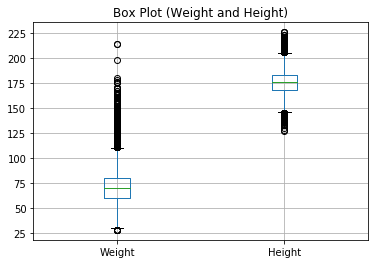

In [8]:
#more num of outliers, it would be statically insignificant if removed
dfc.boxplot(column=["Weight", "Height"])
plt.title("Box Plot (Weight and Height)")
plt.show()

['IND', 'USA', 'CHN', 'PAK', 'JPN', 'SWE', 'SVK', 'POL', 'ESP', 'SVK']


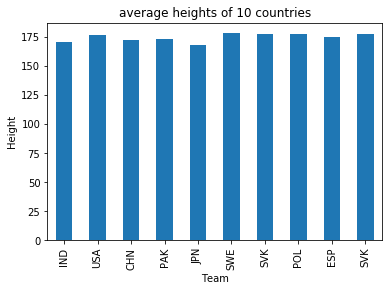

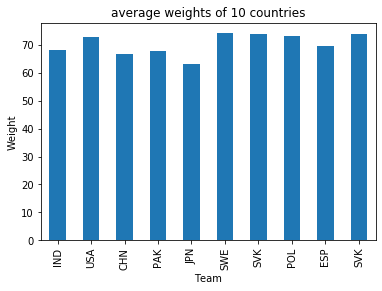

In [9]:
#average height of olympic players, country wise
# IND, USA, CHN, PAK, JPN and few other randomly choosen teams

import random
con_list = ["IND", "USA", "CHN", "PAK", "JPN"]
#lets add few more random teams to list
con_list.extend([df.NOC[random.randrange(0, len(df.NOC))] for i in range(5)])
print(con_list)

df1 = dfc.groupby("NOC").mean().loc[con_list]

df1.Height.plot(kind="bar") #average heights of 10 countries
plt.title("average heights of 10 countries")
plt.xlabel("Team")
plt.ylabel("Height")
plt.show()

df1.Weight.plot(kind="bar") #average heights of 10 countries
plt.title("average weights of 10 countries")
plt.xlabel("Team")
plt.ylabel("Weight")
plt.show()

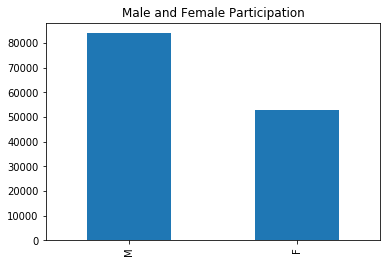

In [11]:
#lets compare number, heights and weights of male and felmale players
df.Sex.value_counts().plot(kind="bar") #male participation is more
plt.title("Male and Female Participation")
plt.show()

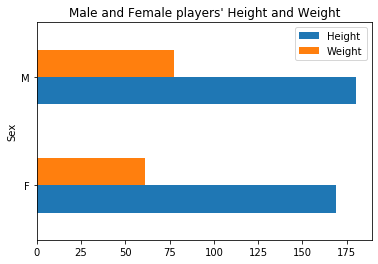

In [12]:
df.groupby("Sex").mean().loc[:,["Height", "Weight"]].plot(kind="barh") #height and weight comparision
plt.title("Male and Female players' Height and Weight")
plt.show()

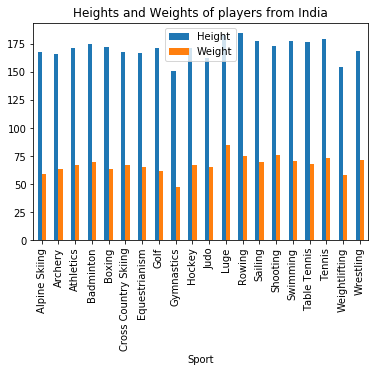

In [13]:
#lets compare average heights and weights of participants of different sports within India
df2 = dfc.groupby(["NOC", "Sport"]).mean().loc["IND"]
df2.loc[:,["Height", "Weight"]].plot(kind='bar')
plt.title("Heights and Weights of players from India")
plt.show()

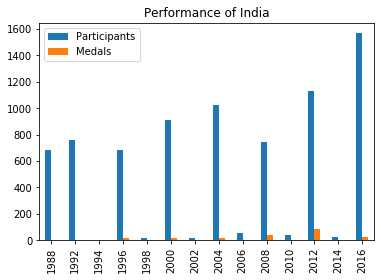

In [14]:
#participants and number of medals won by India year wise
df2 = dfc.loc[dfc["NOC"]=="IND"]
newdf = pd.DataFrame(columns=["Participants", "Medals"])
years = dfc.Year.unique()
for year in years:
    tempdf = df2.loc[dfc["Year"]==year]
    people = tempdf.drop_duplicates("ID").size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[year] = [people, medals]
newdf.plot(kind="bar")
plt.title("Performance of India")
plt.show()

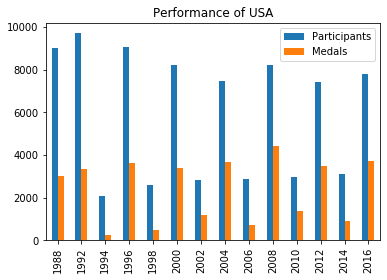

In [15]:
#participants and number of medals won by USA year wise
df2 = dfc.loc[(dfc["NOC"]=="USA")]
newdf = pd.DataFrame(columns=["Participants", "Medals"])
years = dfc.Year.unique()
for year in years:
    tempdf = df2.loc[dfc["Year"]==year]
    people = tempdf.drop_duplicates("ID").size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[year] = [people, medals]
newdf.plot(kind="bar")
plt.title("Performance of USA")
plt.show()

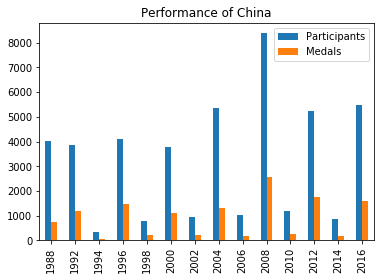

In [16]:
#participants and number of medals won by China year wise
df2 = dfc.loc[dfc["NOC"]=="CHN"]
newdf = pd.DataFrame(columns=["Participants", "Medals"])
years = dfc.Year.unique()
for year in years:
    tempdf = df2.loc[dfc["Year"]==year]
    people = tempdf.drop_duplicates("ID").size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[year] = [people, medals]
newdf.plot(kind="bar")
plt.title("Performance of China")
plt.show()

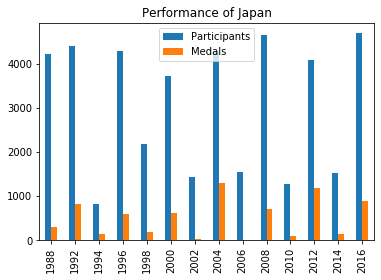

In [17]:
#participants and number of medals won by Japan year wise
df2 = dfc.loc[dfc["NOC"]=="JPN"]
newdf = pd.DataFrame(columns=["Participants", "Medals"])
years = dfc.Year.unique()
for year in years:
    tempdf = df2.loc[dfc["Year"]==year]
    people = tempdf.drop_duplicates("ID").size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[year] = [people, medals]
newdf.plot(kind="bar")
plt.title("Performance of Japan")
plt.show()

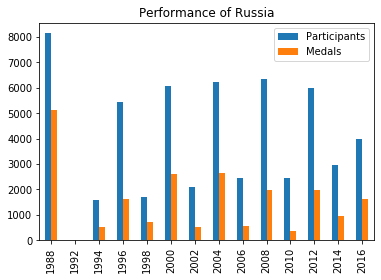

In [18]:
#participants and number of medals won by Russia year wise
df2 = dfc.loc[(dfc["NOC"]=="RUS") | (dfc["NOC"]=="URS")]
newdf = pd.DataFrame(columns=["Participants", "Medals"])
years = dfc.Year.unique()
for year in years:
    tempdf = df2.loc[dfc["Year"]==year]
    people = tempdf.drop_duplicates("ID").size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[year] = [people, medals]
newdf.plot(kind="bar")
plt.title("Performance of Russia")
plt.show()

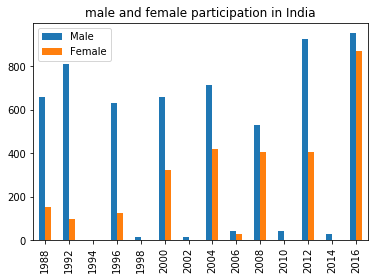

In [19]:
#lets see about male and female participation from India, year wise
df2 = dfc.loc[dfc["NOC"]=="IND"]
years = dfc.Year.unique()
newdf = pd.DataFrame(columns=['Male', 'Female'])
for year in years:
    tempdf = df2.loc[df2["Year"]==year]
    male = tempdf.loc[tempdf["Sex"]=="M"].size
    female = tempdf.loc[tempdf["Sex"]=="F"].size
    newdf.loc[year] = [male, female]
newdf.plot(kind="bar")
plt.title("male and female participation in India")
plt.show()

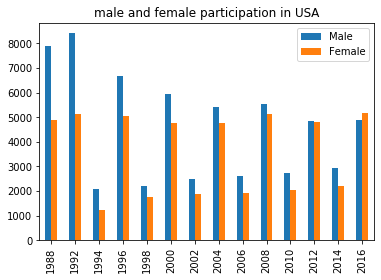

In [20]:
#lets see about male and female participation from USA, year wise
df2 = dfc.loc[dfc["NOC"]=="USA"]
years = dfc.Year.unique()
newdf = pd.DataFrame(columns=['Male', 'Female'])
for year in years:
    tempdf = df2.loc[df2["Year"]==year]
    male = tempdf.loc[tempdf["Sex"]=="M"].size
    female = tempdf.loc[tempdf["Sex"]=="F"].size
    newdf.loc[year] = [male, female]
newdf.plot(kind="bar")
plt.title("male and female participation in USA")
plt.show()

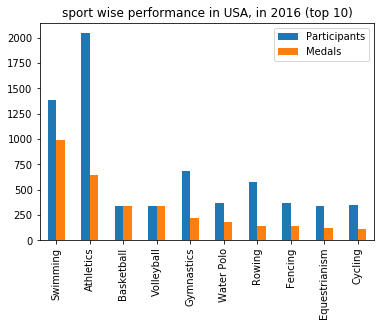

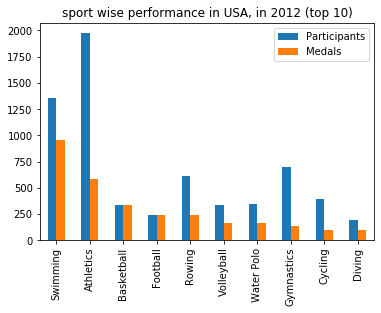

In [21]:
#sport wise performance in USA, in 2016
df2 = dfc.loc[(dfc["NOC"]=="USA") & (dfc["Year"]==2016)]
sport_list = dfc['Sport'].unique()
newdf = pd.DataFrame(columns=["Participants", "Medals"])
for sport in sport_list:
    tempdf = df2.loc[df2["Sport"]==sport]
    participants = tempdf.size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[sport] = [participants, medals]
newdf.sort_values("Medals", ascending=0, inplace=True)
newdf[0:10].plot(kind="bar")
plt.title("sport wise performance in USA, in 2016 (top 10)")
plt.show()

#sport wise performance in USA, in 2012
df2 = dfc.loc[(dfc["NOC"]=="USA") & (dfc["Year"]==2012)]
sport_list = dfc['Sport'].unique()
newdf = pd.DataFrame(columns=["Participants", "Medals"])
for sport in sport_list:
    tempdf = df2.loc[df2["Sport"]==sport]
    participants = tempdf.size
    medals = tempdf.loc[tempdf["Medal"]!='none'].size
    newdf.loc[sport] = [participants, medals]
newdf.sort_values("Medals", ascending=0, inplace=True)
newdf[0:10].plot(kind="bar")
plt.title("sport wise performance in USA, in 2012 (top 10)")
plt.show()

#we can say that USA gets more medals in swimming

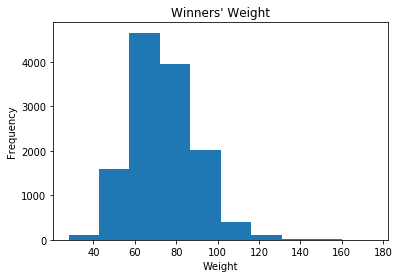

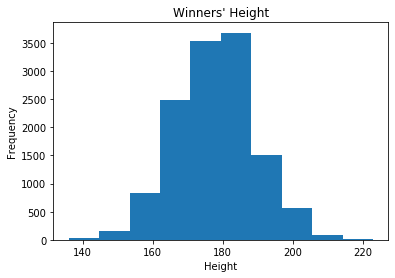

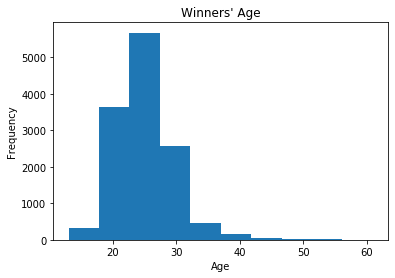

In [22]:
#lets see the height and weight distribution of winners
dftemp = dfc.loc[dfc["Medal"]!='none'].drop_duplicates("ID")
plt.hist(dftemp.Weight)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Winners' Weight")
plt.show()
plt.hist(dftemp.Height)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Winners' Height")
plt.show()
plt.hist(dftemp.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Winners' Age")
plt.show()

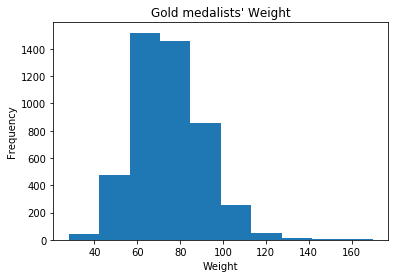

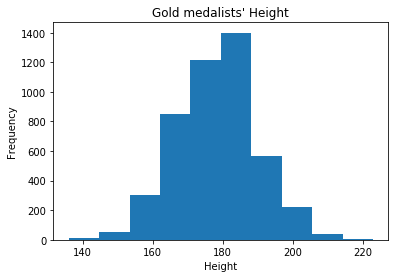

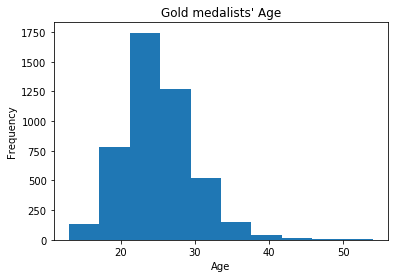

In [23]:
#lets see the height and weight distribution of gold medalists
dftemp = dfc.loc[dfc["Medal"]=="Gold"].drop_duplicates("ID")
plt.hist(dftemp.Weight)
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Gold medalists' Weight")
plt.show()
plt.hist(dftemp.Height)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Gold medalists' Height")
plt.show()
plt.hist(dftemp.Age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Gold medalists' Age")
plt.show()

Normalization and Standardization

In [24]:
df = pd.read_csv('./csvs/full-cleaned.csv')

In [25]:
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,22.0,175.799197,70.803213,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,24.0,176.000000,66.000000,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,22.0,188.000000,96.000000,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [26]:
#computing mean and variance of each numerical column
for col in df.columns:
    if df[col].dtype == 'float64':
        print("mean " + col + ":", df[col].mean())
        print("variance of " + col + ":", df[col].var())

mean Age: 25.321761794326413
variance of Age: 29.05409704339148
mean Height: 175.7463536854656
variance of Height: 115.57030979533694
mean Weight: 70.98452274291073
variance of Weight: 220.09437679089913


In [27]:
#There are multiple normalization techniques in statistics
#Normalization of data using z-score methodin each column to make mean = 0 and variance = 1
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Height'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()
df['Weight'] = (df['Weight'] - df['Weight'].mean()) / df['Weight'].std()

In [28]:
df.head() #normalized dataset

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,-0.801784,0.860775,0.742504,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,-0.801784,0.860775,0.742504,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,-0.616261,0.004915,-0.012221,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,-0.245216,0.023594,-0.335984,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,-0.616261,1.139836,1.686181,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [29]:
#saving to .csv file
df.to_csv("./csvs/normalized-data.csv", index=False)

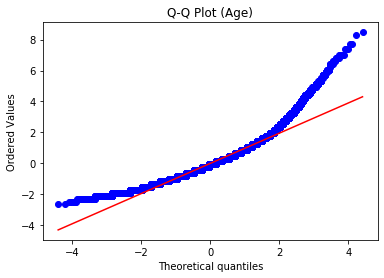

In [34]:
#“Normal Q-Q Plot” provides a graphical way to determine the level of normality
import scipy.stats as stats
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot (Age)")
plt.show()

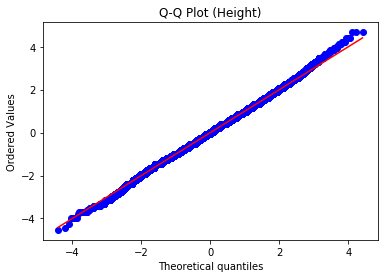

In [35]:
stats.probplot(df['Height'], dist="norm", plot=plt)
plt.title("Q-Q Plot (Height)")
plt.show()

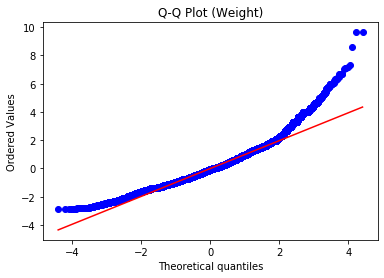

In [36]:
stats.probplot(df['Weight'], dist="norm", plot=plt)
plt.title("Q-Q Plot (Weight)")
plt.show()

In [37]:
#Age and Weight are NOT normally distributed (they are right skewed)
#whereas Height is normally distributed

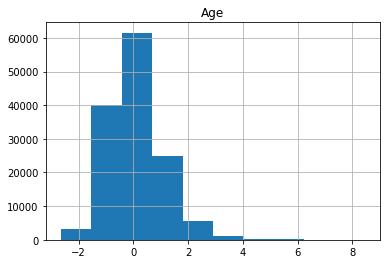

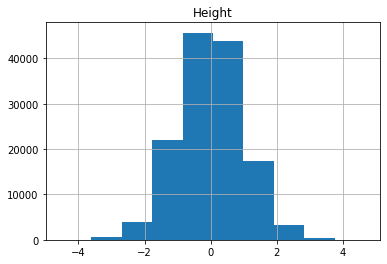

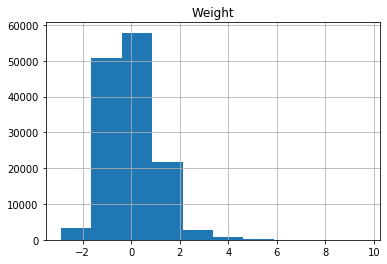

In [41]:
df["Age"].hist() #right skewed
plt.title("Age")
plt.show()
df["Height"].hist() #normal
plt.title("Height")
plt.show()
df["Weight"].hist() #right skewed
plt.title("Weight")
plt.show()

Hypothesis Testing

In [2]:
df = pd.read_csv("./csvs/full-cleaned.csv")
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,22.0,175.799197,70.803213,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,24.0,176.000000,66.000000,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,22.0,188.000000,96.000000,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [3]:
#One of our friend thinks that mean height of Indian Olympic players is 172cm.
#Lets perform a Hypothesis test, to verify the truthness of the assumption

#lets take, 
#Null hypothesis,      Ho: xbar = 175 cm
#Alternate hypothesis, H1: xbar != 175 cm
#so, its a two-tailed test

In [8]:
#now, lets select a random sample of 100 Indian Players
#we are selecting 100 players from the dataframe of unique Indian Players

n = 100
sample = df.loc[df.NOC == 'IND'].drop_duplicates("ID").sample(n=n)
print("Sample Heights are:", list(sample.Height))

Sample Heights are: [179.0, 187.0, 162.0, 173.0, 163.0, 175.0, 185.0, 171.46666666666667, 170.9306930693069, 180.0, 170.9306930693069, 160.0, 166.0, 173.0, 174.0, 172.0, 193.0, 172.7076923076923, 176.0, 167.0, 170.0, 191.0, 180.0, 159.0, 170.0, 172.7076923076923, 162.0, 170.9306930693069, 191.0, 162.0, 173.0, 170.0, 175.0, 163.0, 162.6, 181.0, 185.0, 160.0, 176.0, 154.5, 167.0, 155.0, 162.0, 163.0, 177.0, 175.0, 180.0, 171.85714285714286, 180.0, 162.0, 185.0, 175.0, 167.0, 154.5, 177.64285714285714, 184.0, 158.0, 182.0, 178.0, 164.0, 191.0, 171.46666666666667, 167.0, 167.0, 159.0, 169.0, 149.0, 177.64285714285714, 156.0, 168.0, 175.0, 175.0, 167.0, 172.0, 170.0, 180.0, 171.46666666666667, 167.0, 182.0, 171.46666666666667, 180.0, 165.0, 186.0, 175.0, 177.0, 167.0, 176.0, 177.0, 178.0, 175.0, 165.0, 170.9306930693069, 182.0, 168.0, 172.0, 165.0, 164.0, 173.0, 178.0, 170.9306930693069]


In [9]:
xbar = sample.Height.mean()
s = sample.Height.std()
print("observed mean:",xbar)
print("observed std:", s)
print("n:", n)

observed mean: 171.88678373771444
observed std: 8.818677842775166
n: 100


In [10]:
#now, lets test the hypothesis
z = (xbar-172)/(s/(n**0.5))
print("Z-score:",z)

p_value = st.norm.cdf(z)*2
print("p-value:",p_value)

Z-score: -0.12838235425315578
p-value: 0.8978463948598004


In [11]:
#significance level as 0.05
if(p_value <= 0.05):
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is plausible")

Null hypothesis is plausible


In [12]:
#so, from the result of Hypothesis test, we can conclude that,
#our friend's assumption is plausible, ie Indian olympic players are very likely (plausible) to have average height of 172 cm

Co-relation between values

In [44]:
df = pd.read_csv("./csvs/normalized-data.csv")
df.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,F,-0.801784,0.860775,0.742504,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,none
1,5,F,-0.801784,0.860775,0.742504,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",none
2,29,F,-0.616261,0.004915,-0.012221,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
3,57,M,-0.245216,0.023594,-0.335984,Bulgaria,BUL,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,none
4,106,M,-0.616261,1.139836,1.686181,Italy,ITA,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Quadruple Sculls,Gold


In [58]:
df.drop("ID", axis=1).corr() #ID is dropped, because ID isn't really meaningfull in comparisions

,Age,Height,Weight,Year
Age,1.000000,0.146260,0.199161,0.128848
Height,0.146260,1.000000,0.794588,0.005511
Weight,0.199161,0.794588,1.000000,0.005891
Year,0.128848,0.005511,0.005891,1.000000


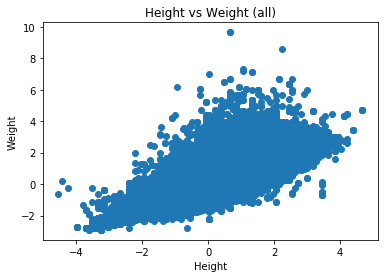

In [45]:
#lets see the relation between heights and weights of olympic players
plt.scatter(df.Height, df.Weight)
plt.title("Height vs Weight (all)")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()
#though the plot is spread, we can see that with height, weight is increasing

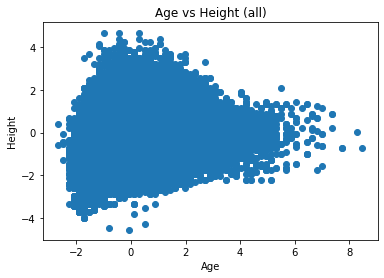

In [47]:
#relation between age and height of players
plt.scatter(df.Age, df.Height)
plt.title("Age vs Height (all)")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()
#we can notice that there isnt any kind of relation, but can say that range of height is getting less, with increasing Age

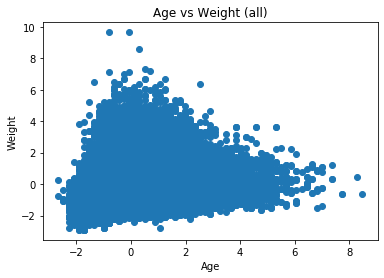

In [48]:
#relation between age and Weight of players
plt.scatter(df.Age, df.Weight)
plt.title("Age vs Weight (all)")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()
#we can notice that there isnt any kind of relation, but range is getting low over the age

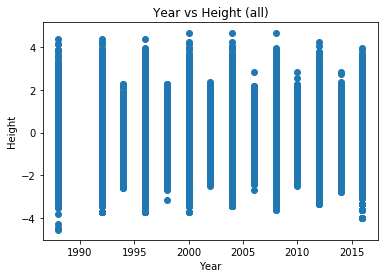

In [49]:
#this actually gives the range of heights in a particular year
plt.scatter(df.Year, df.Height)
plt.title("Year vs Height (all)")
plt.xlabel("Year")
plt.ylabel("Height")
plt.show()

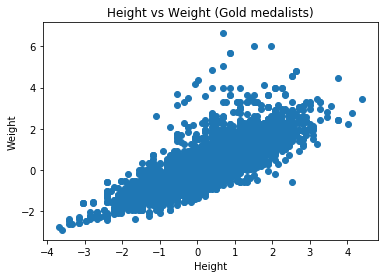

In [50]:
#lets see the Height and Weight relation of Gold-medalists
dftemp = df.loc[df["Medal"]=="Gold"].copy()
plt.scatter(dftemp.Height, dftemp.Weight)
plt.title("Height vs Weight (Gold medalists)")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

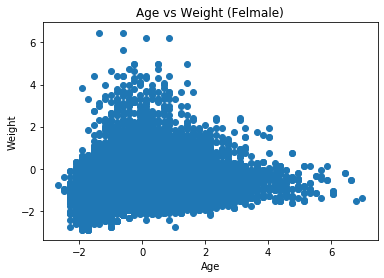

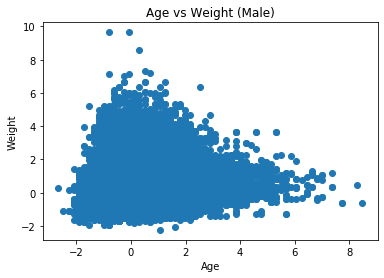

In [53]:
#Age vs Weight plot of female olympic players
dftemp = df.loc[df["Sex"]=='F'].copy()
plt.scatter(dftemp.Age, dftemp.Weight)
plt.title("Age vs Weight (Felmale)")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

#Age vs Weight plot of male olympic players
dftemp = df.loc[df["Sex"]=='M'].copy()
plt.scatter(dftemp.Age, dftemp.Weight)
plt.title("Age vs Weight (Male)")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

#so, both male and female distribution are similar to overall distribution

In [ ]:
#the end